* [video](https://www.youtube.com/watch?v=chfwJiXvBMA&list=PL2UML_KCiC0UlY7iCQDSiGDMovaupqc83&index=2)
* [notebook](https://github.com/kuleshov/cornell-cs5785-applied-ml/blob/main/notebooks/lecture1-introduction.ipynb)

In [52]:
from sklearn import datasets
import matplotlib.pyplot as plt
#boston = datasets.load_boston(as_frame=True)
X,y = datasets.load_boston(return_X_y=True)
Boston = datasets.load_boston()
print(Boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

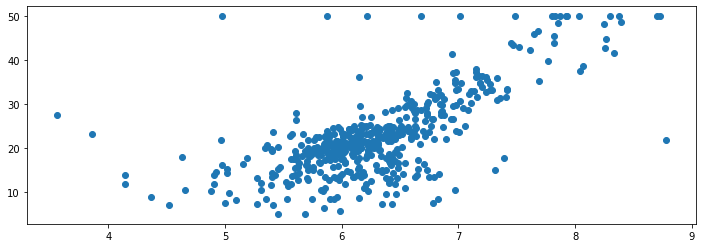

In [61]:
plt.rcParams["figure.figsize"] = [12,4]
# 5 = RM rooms
plt.scatter(X[:,5],y)

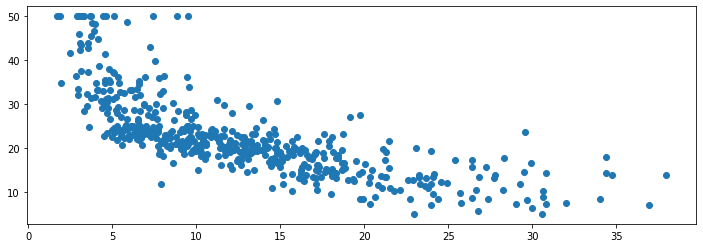

In [62]:
# 12 = Lower status of population
plt.scatter(X[:,12],y)

In [69]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge 
# Applu a supervised learning model
model = KernelRidge(alpha = 1, kernel = 'poly')
model.fit(boston.data[:,[12]],boston.target.flatten())
predictions = model.predict(np.linspace(2,35)[:,np.newaxis])

Text(0.5, 1.0, 'House prices as a function of average neighborhood education level')

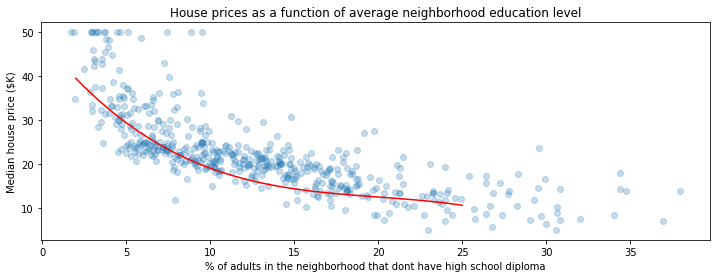

In [71]:
plt.scatter(boston.data[:,[12]], boston.target, alpha=0.25)
plt.plot(np.linspace(2,25),predictions,c="red")
plt.ylabel("Median house price ($K)")
plt.xlabel("% of adults in the neighborhood that dont have high school diploma")
plt.title("House prices as a function of average neighborhood education level")

### Irish dataset
* [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Text(0.5, 1.0, 'Dataset of the Iris flower')

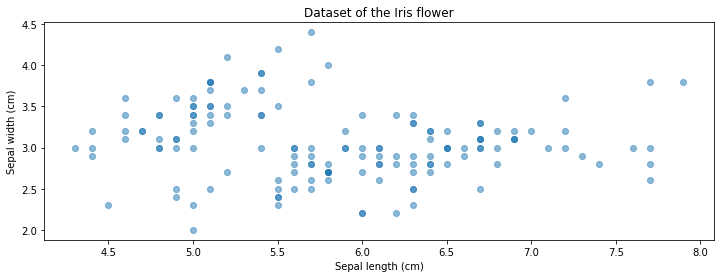

In [74]:
# Load anv visualize the Iris flower dataset
iris = datasets.load_iris()
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of the Iris flower")


In [73]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [75]:
# fit a Gaussian Mixture Model with three components
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model.fit(iris.data[:,[0,1]])

GaussianMixture(n_components=3)

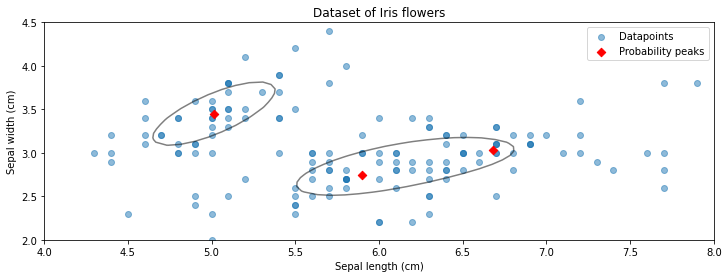

In [82]:
#displayed learned probabilities as a contour plot
x, y = np.linspace(4.0,8.0), np.linspace(2.0,4.5)
X,Y = np.meshgrid(x,y)
Z = -model.score_samples(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contour(X, Y, Z, levels=np.logspace(0, 10, 1), cmap="gray", alpha=0.5)
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(['Datapoints', 'Probability peaks'])

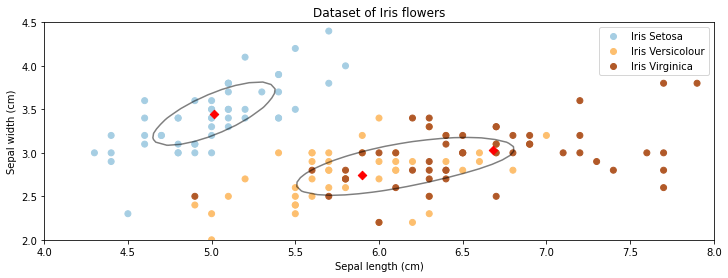

In [83]:
CS = plt.contour(X, Y, Z, levels=np.logspace(0, 30, 1), cmap='gray', alpha=0.5)
p1 = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=1, c=iris.target, cmap='Paired')
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

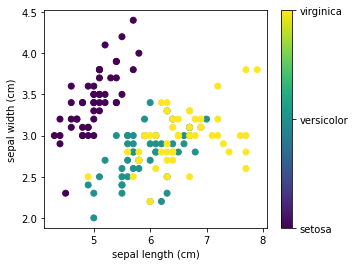

In [85]:
# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

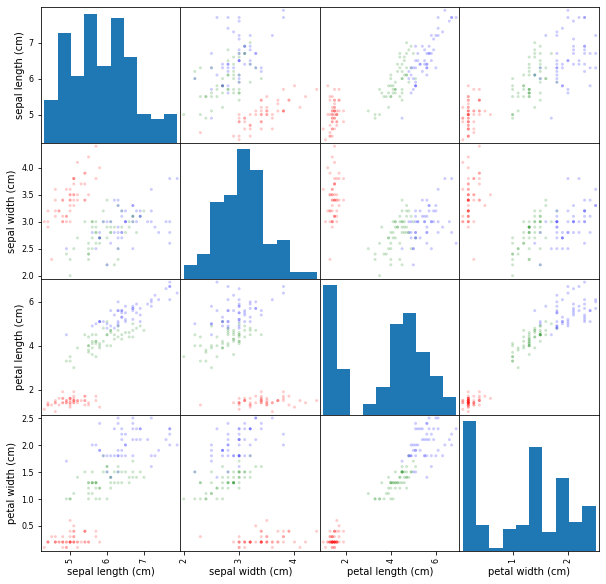

In [87]:
from sklearn.datasets import load_iris
from numpy import array
from pandas import DataFrame
from pandas.plotting import scatter_matrix

iris = load_iris()
df = DataFrame(iris.data, columns=iris.feature_names)
colors=array(50*['r']+50*['g']+50*['b'])
scatter_matrix(df, alpha=0.2, figsize=(10,10), color=colors)

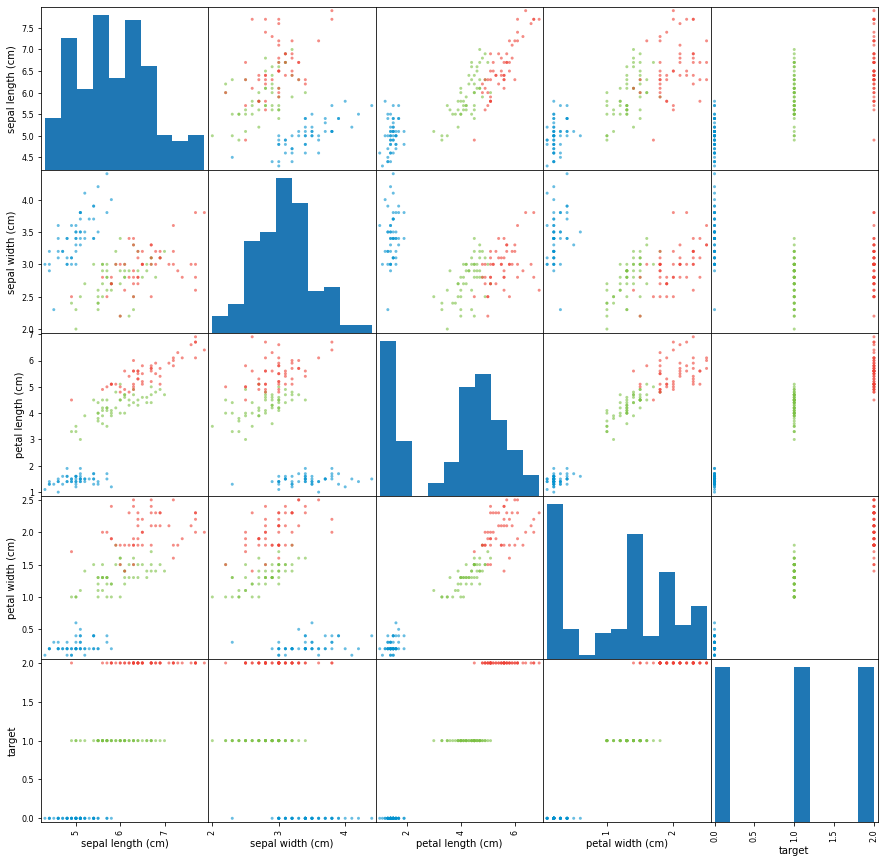

In [89]:
from pandas.plotting import scatter_matrix
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = iris_data["target"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>,
        <AxesSubplot:xlabel='3', ylabel='2'>],
       [<AxesSubplot:xlabel='0', ylabel='3'>,
        <AxesSubplot:xlabel='1', ylabel='3'>,
        <AxesSubplot:xlabel='2', ylabel='3'>,
        <AxesSubplot:xlabel='3', ylabel='3'>]], dtype=object)

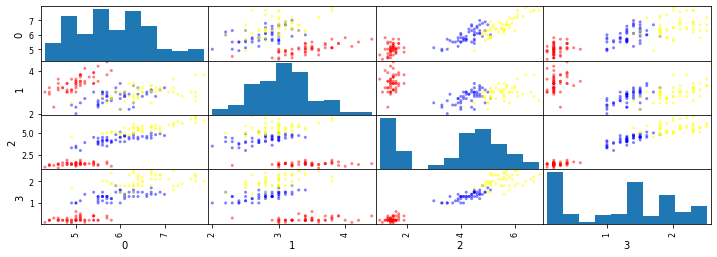

In [90]:
iris = datasets.load_iris()
df=pd.DataFrame(iris.data)
colMap={0:"red",1:"blue",2:"yellow"}
cols=list(map(lambda x:colMap.get(x),iris.target))
scatter_matrix(df,  diagonal='hist',c=cols)

In [92]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']